<a href="https://colab.research.google.com/github/serinss/seSAC_ML_DL_Class/blob/main/07_2_%EC%8B%AC%EC%B8%B5_%EC%8B%A0%EA%B2%BD%EB%A7%9D.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
%run my_init.py

Mounted at /content/drive


In [2]:
%matplotlib inline

#런타임 유형 GPU로 변경

In [3]:
from tensorflow import keras # 텐서플로우의 High level API

(X_train, y_train), (X_test, y_test) = keras.datasets.fashion_mnist.load_data()

4431872/4422102 [==============================] - 0s 0us/step


In [4]:
print(X_train.shape, y_train.shape)

(60000, 28, 28) (60000,)


In [5]:
print(X_test.shape, y_test.shape)

(10000, 28, 28) (10000,)


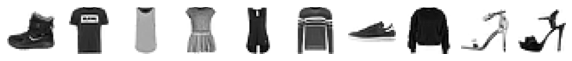

In [6]:
fig, axs = plt.subplots(1, 10, figsize=(10,10))
for i in range(10):
  axs[i].imshow(X_train[i], cmap='gray_r') # 60000개 중에 0번째 이미지부터 반환
  axs[i].axis('off')
plt.show()

In [7]:
first_10 = [y_train[i] for i in range(10)]
first_10

[9, 0, 0, 3, 0, 2, 7, 2, 5, 5]

In [8]:
classes = ['T-shirt/top','Trouser','Pullover','Dress','Coat','Sandal','Shirt','Sneaker','Bag','Ankle boot']

In [9]:
[classes[i] for i in first_10]

['Ankle boot',
 'T-shirt/top',
 'T-shirt/top',
 'Dress',
 'T-shirt/top',
 'Pullover',
 'Sneaker',
 'Pullover',
 'Sandal',
 'Sandal']

In [10]:
X_train_scaled = X_train/255.0
X_train_scaled = X_train_scaled.reshape(-1, 28*28)

print(X_train_scaled.shape)

(60000, 784)


In [11]:
sc = SGDClassifier(loss='log', max_iter=5, random_state=42) 
scores = cross_validate(sc, X_train_scaled, y_train, n_jobs=-1)
print(np.mean(scores['test_score'])) # validation score

0.8195666666666668


In [12]:
X_train_scaled, X_val_scaled, y_train, y_val = train_test_split(X_train_scaled, y_train, test_size=0.2, random_state=42) #test_size = validation data size
print(X_train_scaled.shape, y_train.shape)

(48000, 784) (48000,)


In [13]:
print( X_val_scaled.shape, y_val.shape)

(12000, 784) (12000,)


# 심층 신경망 만들기

In [14]:
dense1 = keras.layers.Dense(100, activation='sigmoid', input_shape=(784,), name='hidden') # 은닉층
dense2 = keras.layers.Dense(10, activation='softmax', name='output') # 출력층

model = keras.Sequential([dense1, dense2], name='fashion_mnist_model') # 레이어의 총 수 = 3개 (기본이 입력층, 출력층 2개)
model.summary() 
# input(Dense)            (None, 784) - 뉴런의 개수 중요!    0 - 학습된 파라미터도 없음

Model: "fashion_mnist_model"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 hidden (Dense)              (None, 100)               78500     
                                                                 
 output (Dense)              (None, 10)                1010      
                                                                 
Total params: 79,510
Trainable params: 79,510
Non-trainable params: 0
_________________________________________________________________


In [15]:
# 다른 방법 - 이 방법이 훨씬 잘 쓰인다.

model2 = keras.Sequential([
                           keras.layers.Dense(100, activation='sigmoid', input_shape=(784,), name='hidden'),
                           keras.layers.Dense(10, activation='softmax', name='output')
], name='패션MNIST모델') 
# name에 공백이 있으면 fit() 할 때 에러 주의!! 
# A root scope name has to match the following pattern: ^[A-Za-z0-9.][A-Za-z0-9_.\\/>-]*$  --> 스페이스 없음
# ^ : 시작, $ : 끝
# [a-zA-Z]* : 여러 개(zero or more)
# [a-zA-Z]+ : 하나 이상(one or more)
model2.summary()

Model: "패션MNIST모델"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 hidden (Dense)              (None, 100)               78500     
                                                                 
 output (Dense)              (None, 10)                1010      
                                                                 
Total params: 79,510
Trainable params: 79,510
Non-trainable params: 0
_________________________________________________________________


정규표현식 예시  
https://regexlib.com/Search.aspx?k=phone  
^[2-9]\d{2}-\d{3}-\d{4}$  
[ ] 범위, digit, {빈도수} 등등의 조건으로 식을 만든다   
-> 전처리 과정에서 정규표현식을 이해할 줄 알아야 함   

In [16]:
# 다른 방법

model3 = keras.Sequential()
model3.add(keras.layers.Dense(100, activation='sigmoid', input_shape=(784,)))
model3.add(keras.layers.Dense(10, activation='softmax'))
model3.summary()

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 dense (Dense)               (None, 100)               78500     
                                                                 
 dense_1 (Dense)             (None, 10)                1010      
                                                                 
Total params: 79,510
Trainable params: 79,510
Non-trainable params: 0
_________________________________________________________________


In [17]:
model.compile(loss='sparse_categorical_crossentropy', metrics='accuracy')
model.fit(X_train_scaled, y_train, epochs=5)

# 인공 신경망에 몇 개의 층이 추가되어도 compile(),fit() 방법은 동일

Epoch 1/5
1500/1500 [==============================] - 7s 3ms/step - loss: 0.5610 - accuracy: 0.8089
Epoch 2/5
1500/1500 [==============================] - 4s 3ms/step - loss: 0.4099 - accuracy: 0.8516
Epoch 3/5
1500/1500 [==============================] - 4s 3ms/step - loss: 0.3755 - accuracy: 0.8653
Epoch 4/5
1500/1500 [==============================] - 4s 3ms/step - loss: 0.3526 - accuracy: 0.8723
Epoch 5/5
1500/1500 [==============================] - 4s 3ms/step - loss: 0.3360 - accuracy: 0.8783


# 렐루함수(ReLU)
심층 신경망-이미지 처리가 뛰어남   

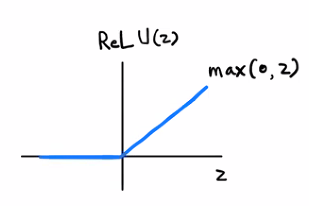

In [18]:
model = keras.Sequential(name='fashion_mnist_model')
input = keras.layers.Flatten(input_shape=(28,28), name='input')
hidden = keras.layers.Dense(100, activation='relu', name='hidden')
output = keras.layers.Dense(10, activation='softmax', name='output')

model.add(input)
model.add(hidden)
model.add(output)
model.summary() 

Model: "fashion_mnist_model"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 input (Flatten)             (None, 784)               0         
                                                                 
 hidden (Dense)              (None, 100)               78500     
                                                                 
 output (Dense)              (None, 10)                1010      
                                                                 
Total params: 79,510
Trainable params: 79,510
Non-trainable params: 0
_________________________________________________________________


In [19]:
#?keras.layers.InputLayer
#Flatten 편법으로 보이게 한 것
#   장점 : 원래 코드를 그대로 유지하면서 (reshape하지 않고) 바로 가져다가 쓸 수 있었음
#          model summary하면 layer가 그대로 보임

# input-layer(28*28, 2차원) -> Flatten((784,) 1차원) -> Dense -> output-layer(Dense)
# reshape할 필요 없음

In [20]:
# 다시 샘플의 크기 셋팅해서 학습시켜보기

(X_train, y_train), (X_test, y_test) = keras.datasets.fashion_mnist.load_data()
X_train_scaled = X_train/255.0
X_train_scaled.shape

(60000, 28, 28)

In [21]:
X_train_scaled, X_val_scaled, y_train, y_val = train_test_split(X_train_scaled, y_train, test_size=0.2, random_state=42)
print(X_train_scaled.shape, y_train.shape)

(48000, 28, 28) (48000,)


In [27]:
#?model.compile

In [22]:
model.compile(loss='sparse_categorical_crossentropy', metrics='accuracy')
model.fit(X_train_scaled, y_train, epochs=5)

# Input 0 of layer "fashion_mnist_model" is incompatible with the layer: expected shape=(None, 28, 28), found shape=(32, 784)
# 1차원으로 합쳤던 reshape 과정을 생략해야 함

Epoch 1/5
1500/1500 [==============================] - 5s 3ms/step - loss: 0.5273 - accuracy: 0.8151
Epoch 2/5
1500/1500 [==============================] - 4s 3ms/step - loss: 0.3896 - accuracy: 0.8604
Epoch 3/5
1500/1500 [==============================] - 4s 3ms/step - loss: 0.3535 - accuracy: 0.8735
Epoch 4/5
1500/1500 [==============================] - 4s 3ms/step - loss: 0.3320 - accuracy: 0.8812
Epoch 5/5
1500/1500 [==============================] - 4s 3ms/step - loss: 0.3186 - accuracy: 0.8863


In [23]:
model.evaluate(X_val_scaled, y_val)

375/375 [==============================] - 1s 2ms/step - loss: 0.3510 - accuracy: 0.8815


[0.35100674629211426, 0.8815000057220459]

375/375 [==============================] - 1s 2ms/step - loss: 0.4460 - accuracy: 0.8526  
심층이 없었을 때와 비교하면 성능이 올라갔음!

# 참고(categorical_crossentropy 사용)
만약 타겟층이 정수가 아니라면?! -> sparse_categorical_crossentropy 사용불가  

In [24]:
y_train[0]

7

In [25]:
keras.utils.to_categorical(y_train)[0]
# y_train의 모든 데이터를 one-hot encoding 형태로 만들어줌 ->  그 중에 하나 출력해보기
# 그냥 값만 하나 넣으면 순서로 인식함
# keras.utils.to_categorical(y_train[0]) - 이건 안된다는 의미

array([0., 0., 0., 0., 0., 0., 0., 1., 0., 0.], dtype=float32)

In [26]:
model.compile(loss='categorical_crossentropy', metrics='accuracy')
model.fit(X_train_scaled, keras.utils.to_categorical(y_train), epochs=5)

# 정확도가 더 높은것 같은??
# 잘 기억해두기! 유용하게 쓸 수 있다

Epoch 1/5
1500/1500 [==============================] - 5s 3ms/step - loss: 0.3086 - accuracy: 0.8921
Epoch 2/5
1500/1500 [==============================] - 5s 3ms/step - loss: 0.2984 - accuracy: 0.8948
Epoch 3/5
1500/1500 [==============================] - 5s 3ms/step - loss: 0.2899 - accuracy: 0.8967
Epoch 4/5
1500/1500 [==============================] - 5s 3ms/step - loss: 0.2856 - accuracy: 0.8999
Epoch 5/5
1500/1500 [==============================] - 5s 3ms/step - loss: 0.2763 - accuracy: 0.9051


#옵티마이저(optimizer)
=최적화기  
손실 함수의 최저 지점을 구하기 위해 미분  

In [28]:
#SGD 사용

model.compile(optimizer='sgd', loss='sparse_categorical_crossentropy', metrics='accuracy')
model.fit(X_train_scaled, y_train, epochs=5)

Epoch 1/5
1500/1500 [==============================] - 4s 2ms/step - loss: 0.2195 - accuracy: 0.9216
Epoch 2/5
1500/1500 [==============================] - 4s 2ms/step - loss: 0.2114 - accuracy: 0.9245
Epoch 3/5
1500/1500 [==============================] - 4s 3ms/step - loss: 0.2078 - accuracy: 0.9255
Epoch 4/5
1500/1500 [==============================] - 4s 3ms/step - loss: 0.2059 - accuracy: 0.9257
Epoch 5/5
1500/1500 [==============================] - 4s 3ms/step - loss: 0.2038 - accuracy: 0.9261


In [29]:
model.evaluate(X_val_scaled, y_val)

375/375 [==============================] - 1s 2ms/step - loss: 0.3307 - accuracy: 0.8929


[0.3306562006473541, 0.8929166793823242]

In [30]:
# 모멘텀 생성

momentum = keras.optimizers.SGD(momentum=0.9)
model.compile(optimizer=momentum, loss='sparse_categorical_crossentropy', metrics='accuracy')
model.fit(X_train_scaled, y_train, epochs=5)

Epoch 1/5
1500/1500 [==============================] - 4s 2ms/step - loss: 0.2438 - accuracy: 0.9117
Epoch 2/5
1500/1500 [==============================] - 4s 3ms/step - loss: 0.2316 - accuracy: 0.9148
Epoch 3/5
1500/1500 [==============================] - 4s 3ms/step - loss: 0.2249 - accuracy: 0.9164
Epoch 4/5
1500/1500 [==============================] - 4s 3ms/step - loss: 0.2194 - accuracy: 0.9192
Epoch 5/5
1500/1500 [==============================] - 4s 3ms/step - loss: 0.2133 - accuracy: 0.9218


In [31]:
model.evaluate(X_val_scaled, y_val)

375/375 [==============================] - 1s 2ms/step - loss: 0.3505 - accuracy: 0.8867


[0.35048699378967285, 0.8866666555404663]

In [32]:
model.compile(optimizer='adam', loss='sparse_categorical_crossentropy', metrics='accuracy')
model.fit(X_train_scaled, y_train, epochs=5)

Epoch 1/5
1500/1500 [==============================] - 4s 3ms/step - loss: 0.2362 - accuracy: 0.9131
Epoch 2/5
1500/1500 [==============================] - 4s 3ms/step - loss: 0.2278 - accuracy: 0.9139
Epoch 3/5
1500/1500 [==============================] - 4s 3ms/step - loss: 0.2189 - accuracy: 0.9185
Epoch 4/5
1500/1500 [==============================] - 4s 3ms/step - loss: 0.2104 - accuracy: 0.9216
Epoch 5/5
1500/1500 [==============================] - 4s 3ms/step - loss: 0.2057 - accuracy: 0.9237


In [ ]:
model.evaluate(X_val_scaled, y_val)

In [33]:
# 아담의 초기학습률 디폴트 = 0.001 --> 0.005로 변경하여 훈련해보기

adam = keras.optimizers.Adam(learning_rate=0.005)
model.compile(optimizer=adam, loss='sparse_categorical_crossentropy', metrics='accuracy')
model.fit(X_train_scaled, y_train, epochs=5)

# 꽤나 안좋은 성과...
# 학습률이 커지니까 성과가 안좋음

Epoch 1/5
1500/1500 [==============================] - 4s 3ms/step - loss: 0.4114 - accuracy: 0.8586
Epoch 2/5
1500/1500 [==============================] - 4s 3ms/step - loss: 0.3638 - accuracy: 0.8659
Epoch 3/5
1500/1500 [==============================] - 4s 3ms/step - loss: 0.3400 - accuracy: 0.8766
Epoch 4/5
1500/1500 [==============================] - 4s 3ms/step - loss: 0.3273 - accuracy: 0.8787
Epoch 5/5
1500/1500 [==============================] - 4s 3ms/step - loss: 0.3194 - accuracy: 0.8823


In [34]:
# 학습률 0.0005로 낮춰보자 - 기본값이랑 비슷

adam = keras.optimizers.Adam(learning_rate=0.0005)
model.compile(optimizer=adam, loss='sparse_categorical_crossentropy', metrics='accuracy')
model.fit(X_train_scaled, y_train, epochs=5)

Epoch 1/5
1500/1500 [==============================] - 4s 3ms/step - loss: 0.2434 - accuracy: 0.9085
Epoch 2/5
1500/1500 [==============================] - 5s 3ms/step - loss: 0.2279 - accuracy: 0.9142
Epoch 3/5
1500/1500 [==============================] - 4s 3ms/step - loss: 0.2197 - accuracy: 0.9185
Epoch 4/5
1500/1500 [==============================] - 4s 3ms/step - loss: 0.2147 - accuracy: 0.9189
Epoch 5/5
1500/1500 [==============================] - 4s 3ms/step - loss: 0.2095 - accuracy: 0.9219
